# <p style="text-align:center;"><span style="font-size:48px;"><span style="color:#007BFF;"><span style="font-family:cursive;"> Corona Virus EDA</span> </span>  </span></p>

<a id="contents_tabel"></a>
<div style="border-radius:10px; padding: 15px; background-color: #8dff99; font-size:115%; text-align:left">

<h3 align="left"><font color=white>Table of Contents :</font></h3>

* [Phase 1 : Import & Install Libraries](#import)    
* [Phase 2 : About Dataset](#about)
    - [Phase 2.1 : Import Dataset](#importdata)
    - [Phase 2.2 : About Features](#features)
* [Phase 3 : Initial EDA ( Exploratory data analysis ) On Dataset](#eda)
    - [Phase 3.1 : Descriptive EDA](#des)
    - [Phase 3.2 : Visualization EDA](#vis)
    - [Phase 3.3 : Intelligently EDA](#ieda)
        - [Phase 3.3.1 : Pandas Profiling](#i1)
        - [Phase 3.3.2 : PandasAI](#i2)   


<a id="import"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 1 : Import & Install Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [238]:
!pip install pandasai
!pip install --upgrade typing
!pip install -U pandas-profiling

In [239]:
!pip install openai

In [245]:
'''This command lists all the installed Python packages in your current environment and redirects that output to a file named libraries.txt.
!: This is used to indicate that the following command should be executed in the shell rather than in Python.
pip list: This command lists all installed packages along with their versions.
> libraries.txt: This part redirects the output of the pip list command to a file named libraries.txt. If the file already exists, it will be overwritten.
'''
!pip list > libraries.txt
'''
This command searches for occurrences of the string "pandasai" in the current directory and its subdirectories.
!: Again, this indicates a shell command.
echo: This command prints the output to the console.
$(...): This syntax captures the output of the command inside the parentheses and substitutes it into the echo command.
grep -r "pandasai" .: This command searches recursively (-r) for the string "pandasai" in the current directory (.).
'''
!echo $(grep -r "pandasai" .)
!echo $(grep -r "pandas-profiling" .)
'''These commands are particularly useful for managing dependencies in Python projects, especially when working with Jupyter Notebooks or in environments where you can execute shell commands directly. Make sure to run these commands in the appropriate context (like a Jupyter Notebook cell) for them to work correctly.'''

$(grep -r "pandasai" .)
$(grep -r "pandas-profiling" .)


'These commands are particularly useful for managing dependencies in Python projects, especially when working with Jupyter Notebooks or in environments where you can execute shell commands directly. Make sure to run these commands in the appropriate context (like a Jupyter Notebook cell) for them to work correctly.'

In [246]:
# Descriptive EDA
'''
this code is used to suppress warning messages in Python.
The warnings module provides a way to handle warning messages generated by Python.
warnings.filterwarnings() is a method from the warnings module that allows you to filter and control the behavior of warning messages.
'''
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import time
## copying data set during operation is an insurance against probable errors
import copy
from sklearn.preprocessing import LabelEncoder

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# IEDA (intelligent eda)

from pandasai import SmartDataframe
from pandasai.llm import OpenAI
from ydata_profiling import ProfileReport

#if we dont want for results to show we can use: %%capture

<a id="import"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 2 : About Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

- **Sno** - Serial number

- **ObservationDate** - Date of the observation in MM/DD/YYYY

- **Province/State** - Province or state of the observation (Could be empty when missing)

- **Country/Region** - Country of observation

- **Last Update** - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)

- **Confirmed** - Cumulative number of confirmed cases till that date

- **Deaths** - Cumulative number of of deaths till that date

- **Recovered** - Cumulative number of recovered cases till that date

<a id="eda"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 3 : Initial EDA ( Exploratory data analysis ) On Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="des"></a>
## <p style="background-color:#23ff16; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 3.1 : Descriptive EDA</p>

⬆️ [Tabel of Contents](#contents_tabel)

<p style="font-family:cursive; color:white; font-size:300%;">Galance Dataset(Weak)</p>

In [247]:
data = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')

In [248]:
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [249]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [250]:
data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


In [251]:
data.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [252]:
data.tail(2)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


<p style="font-family:cursive; color:white; font-size:300%;">Galance Dataset(Powerful)</p>

In [253]:
cm = sns.light_palette("green", as_cmap=True)
data.head(10).style.background_gradient(cmap=cm)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.000000,0.000000,0.000000
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.000000,0.000000,0.000000
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.000000,0.000000,0.000000
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.000000,0.000000,0.000000
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.000000,0.000000,0.000000
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.000000,0.000000,0.000000
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000


<p style="font-family:cursive; color:white; font-size:300%;">Data info (Weak)</p>

In [254]:
# The info() method is commonly used on pandas DataFrames and Series to get a concise summary of the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [255]:
##memory_usage='deep' argument is used to provide a more detailed analysis of the memory usage of the DataFrame or Series.
##The output of data.info(memory_usage='deep') will include an additional row in the summary, showing the "Total" memory usage of the DataFrame, considering the actual data stored in each column.
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 78.1 MB


In [256]:
data.memory_usage()

Index                  132
SNo                2451432
ObservationDate    2451432
Province/State     2451432
Country/Region     2451432
Last Update        2451432
Confirmed          2451432
Deaths             2451432
Recovered          2451432
dtype: int64

In [257]:
data.memory_usage(deep=True)

Index                   132
SNo                 2451432
ObservationDate    18079311
Province/State     16090369
Country/Region     17073176
Last Update        20816199
Confirmed           2451432
Deaths              2451432
Recovered           2451432
dtype: int64

In [258]:
data.memory_usage(deep=True).sum()

81864915

In [259]:
data.memory_usage(index=False, deep=True).sum()

81864783

In [260]:
data.memory_usage(index=True, deep=True).sum()

81864915

**The command data.memory_usage(index=False, deep=True).sum() is used in pandas to calculate the total memory usage of a DataFrame, specifically focusing on the memory consumed by the data itself, including the actual contents of object-type columns. Here's a breakdown of how this command works and what each part means:**
  
Breakdown of the Command
1. data.memory_usage()
This method returns a Series containing the memory usage of each column in the DataFrame.
By default, it calculates the memory usage based on the data type of each column.

2. index=False
This argument specifies that the memory usage of the index should not be included in the calculation. If set to True, the memory used by the index would also be included in the output.

3. deep=True
This argument instructs pandas to calculate the memory usage of object-type columns (like strings) more accurately.
When deep=True, pandas will account for the actual memory consumed by the objects in these columns, rather than just the memory required for the object references.

4. .sum()
This method aggregates the memory usage values from the Series returned by memory_usage() into a single total value.

**FM 1 : Search about memory_usage argument.**

<p style="font-family:cursive; color:white; font-size:300%;">Data info (Powerful)</p>

In [261]:
'''
data.isnull():
This method returns a DataFrame of the same shape as data, but with True where the values are null (missing) and False where they are not.
For example, if data has some missing values, data.isnull() will show True for those entries.

.sum():
When called on a DataFrame of boolean values, the sum() method counts the number of True values along the specified axis (by default, it sums along the columns).
Thus, data.isnull().sum() will return a Series where each entry corresponds to the count of null values for each column.

.values:
This retrieves the underlying numpy array from the Series returned by data.isnull().sum(). This is not strictly necessary, as you can work directly with the Series, but it can be used for clarity in some contexts.

len(data):
This gives the total number of rows in the DataFrame data.
'''
info = pd.DataFrame({"name": data.columns,
                     "non-nulls": len(data) - data.isnull().sum().values,
                     "nulls": data.isnull().sum().values,
                     "type": data.dtypes.values,
                     "memory":data.memory_usage(index=False, deep=True)})

info.style.background_gradient(cmap=cm)

,name,non-nulls,nulls,type,memory
SNo,SNo,306429,0,int64,2451432
ObservationDate,ObservationDate,306429,0,object,18079311
Province/State,Province/State,228326,78103,object,16090369
Country/Region,Country/Region,306429,0,object,17073176
Last Update,Last Update,306429,0,object,20816199
Confirmed,Confirmed,306429,0,float64,2451432
Deaths,Deaths,306429,0,float64,2451432
Recovered,Recovered,306429,0,float64,2451432


<p style="font-family:cursive; color:white; font-size:300%;">Statistical(Waek)</p>

In [262]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


<p style="font-family:cursive; color:white; font-size:300%;">Statistical(Midlevel)</p>

In [263]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SNo,306429.0,NaN,NaN,NaN,153215.0,88458.577156,1.0,76608.0,153215.0,229822.0,306429.0
ObservationDate,306429,494,05/29/2021,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province/State,228326,736,Unknown,4123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,306429,229,Russia,30251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Update,306429,1905,2021-04-02 15:13:53,239885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Confirmed,306429.0,NaN,NaN,NaN,85670.911559,277551.604043,-302844.0,1042.0,10375.0,50752.0,5863138.0
Deaths,306429.0,NaN,NaN,NaN,2036.403268,6410.938048,-178.0,13.0,192.0,1322.0,112385.0
Recovered,306429.0,NaN,NaN,NaN,50420.286304,201512.447838,-854405.0,11.0,1751.0,20270.0,6399531.0


<p style="font-family:cursive; color:white; font-size:300%;">Statistical(Powerful)</p>

In [264]:
# to create a copy of a pandas DataFrame and then encode the categorical columns using the LabelEncoder from scikit-learn.
data_copy = copy.copy(data)
'''
le = LabelEncoder(): This line creates an instance of the LabelEncoder class and assigns it to the variable le. 
The LabelEncoder is used to encode categorical variables as integers.
'''
le = LabelEncoder()
'''
This loop iterates over each column in data_copy where the data type is object. 
The data_copy.dtypes attribute returns the data types of each column, 
and the comparison data_copy.dtypes == object creates a boolean mask that selects only the columns with object data type. 
The loc indexer is used to select these columns.
'''
for column in data_copy.loc[:, data_copy.dtypes == object]:
    #The fit_transform() method first fits the encoder to the unique values in the column and then transforms the column by replacing each unique value with an integer label.
    data_copy[column] = le.fit_transform(data_copy[column])


In [265]:
'''
cm = sns.light_palette("green", as_cmap=True)

info = pd.DataFrame({"name": data.columns,
                     "non-nulls": len(data) - data.isnull().sum().values,
                     "nulls": data.isnull().sum().values,
                     "type": data.dtypes.values,
                     "unique value of feature":data.nunique(),
                     "corr_target": data.corr()["Deaths"],
                     "memory":data.memory_usage(index=False, deep=True)
                    })

describe_stats = data.describe(include='all').T

info["count"] = describe_stats["count"].values
info["mean"] = describe_stats["mean"].values if 'mean' in describe_stats else None
info["std"] = describe_stats["std"].values if 'std' in describe_stats else None
info["min"] = describe_stats["min"].values if 'min' in describe_stats else None
info["25%"] = describe_stats["25%"].values if '25%' in describe_stats else None
info["50%"] = describe_stats["50%"].values if '50%' in describe_stats else None
info["75%"] = describe_stats["75%"].values if '75%' in describe_stats else None
info["max"] = describe_stats["max"].values if 'max' in describe_stats else None
sorted_info = info.sort_values(by='corr_target')
sorted_info.style.background_gradient(cmap=cm)
'''

'\ncm = sns.light_palette("green", as_cmap=True)\n\ninfo = pd.DataFrame({"name": data.columns,\n                     "non-nulls": len(data) - data.isnull().sum().values,\n                     "nulls": data.isnull().sum().values,\n                     "type": data.dtypes.values,\n                     "unique value of feature":data.nunique(),\n                     "corr_target": data.corr()["Deaths"],\n                     "memory":data.memory_usage(index=False, deep=True)\n                    })\n\ndescribe_stats = data.describe(include=\'all\').T\n\ninfo["count"] = describe_stats["count"].values\ninfo["mean"] = describe_stats["mean"].values if \'mean\' in describe_stats else None\ninfo["std"] = describe_stats["std"].values if \'std\' in describe_stats else None\ninfo["min"] = describe_stats["min"].values if \'min\' in describe_stats else None\ninfo["25%"] = describe_stats["25%"].values if \'25%\' in describe_stats else None\ninfo["50%"] = describe_stats["50%"].values if \'50%\' in desc

In [266]:
cm = sns.light_palette("green", as_cmap=True)

info = pd.DataFrame({"name": data_copy.columns,
                     "non-nulls": len(data_copy) - data_copy.isnull().sum().values,
                     "nulls": data_copy.isnull().sum().values,
                     "type": data_copy.dtypes.values,
                     "unique value of feature":data_copy.nunique(),
                     "corr_target": data_copy.corr()["Deaths"],
                     "memory":data_copy.memory_usage(index=False, deep=True)
                    })

describe_stats = data_copy.describe(include='all').T

info["count"] = describe_stats["count"].values
info["mean"] = describe_stats["mean"].values if 'mean' in describe_stats else None
info["std"] = describe_stats["std"].values if 'std' in describe_stats else None
info["min"] = describe_stats["min"].values if 'min' in describe_stats else None
info["25%"] = describe_stats["25%"].values if '25%' in describe_stats else None
info["50%"] = describe_stats["50%"].values if '50%' in describe_stats else None
info["75%"] = describe_stats["75%"].values if '75%' in describe_stats else None
info["max"] = describe_stats["max"].values if 'max' in describe_stats else None
sorted_info = info.sort_values(by='corr_target')
sorted_info.style.background_gradient(cmap=cm)

,name,non-nulls,nulls,type,unique value of feature,corr_target,memory,count,mean,std,min,25%,50%,75%,max
ObservationDate,ObservationDate,306429,0,int32,494,-0.076389,1225716,306429.000000,270.381514,142.302820,0.000000,154.000000,289.000000,392.000000,493.000000
Country/Region,Country/Region,306429,0,int32,229,0.001128,1225716,306429.000000,127.728577,64.218537,0.000000,77.000000,126.000000,178.000000,228.000000
Province/State,Province/State,306429,0,int32,737,0.006412,1225716,306429.000000,462.278221,244.079954,0.000000,254.000000,489.000000,736.000000,736.000000
Last Update,Last Update,306429,0,int32,1905,0.052087,1225716,306429.000000,1822.897712,170.064223,0.000000,1842.000000,1842.000000,1842.000000,1904.000000
SNo,SNo,306429,0,int64,306429,0.197038,2451432,306429.000000,153215.000000,88458.577156,1.000000,76608.000000,153215.000000,229822.000000,306429.000000
Recovered,Recovered,306429,0,float64,74541,0.538416,2451432,306429.000000,50420.286304,201512.447838,-854405.000000,11.000000,1751.000000,20270.000000,6399531.000000
Confirmed,Confirmed,306429,0,float64,107146,0.888416,2451432,306429.000000,85670.911559,277551.604043,-302844.000000,1042.000000,10375.000000,50752.000000,5863138.000000
Deaths,Deaths,306429,0,float64,20089,1.000000,2451432,306429.000000,2036.403268,6410.938048,-178.000000,13.000000,192.000000,1322.000000,112385.000000


<a id="vis"></a>
## <p style="background-color:#23ff16; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 3.2 : Visualization EDA</p>

⬆️ [Tabel of Contents](#contents_tabel)

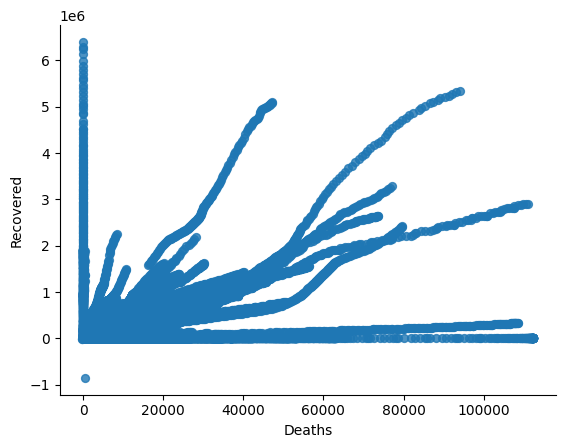

In [267]:
data.plot(kind='scatter', x='Deaths', y='Recovered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

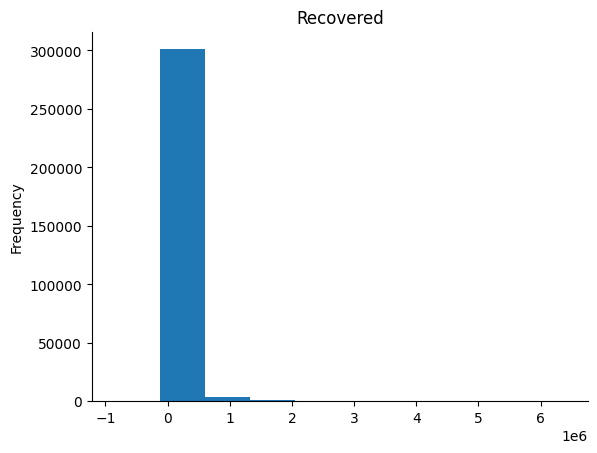

In [268]:
data['Recovered'].plot(kind='hist', bins=10, title='Recovered')
plt.gca().spines[['top', 'right',]].set_visible(False)

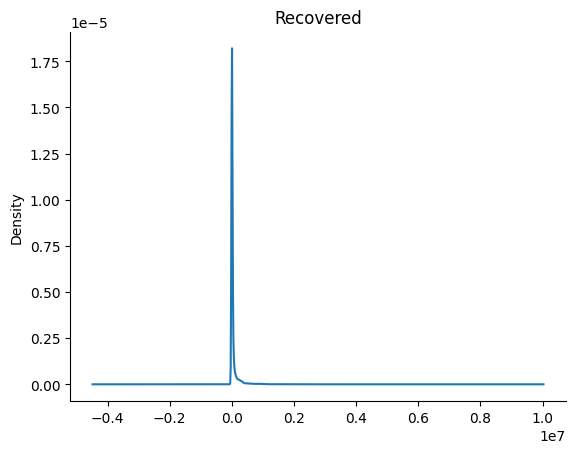

In [269]:
data['Recovered'].plot(kind='kde', title='Recovered')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

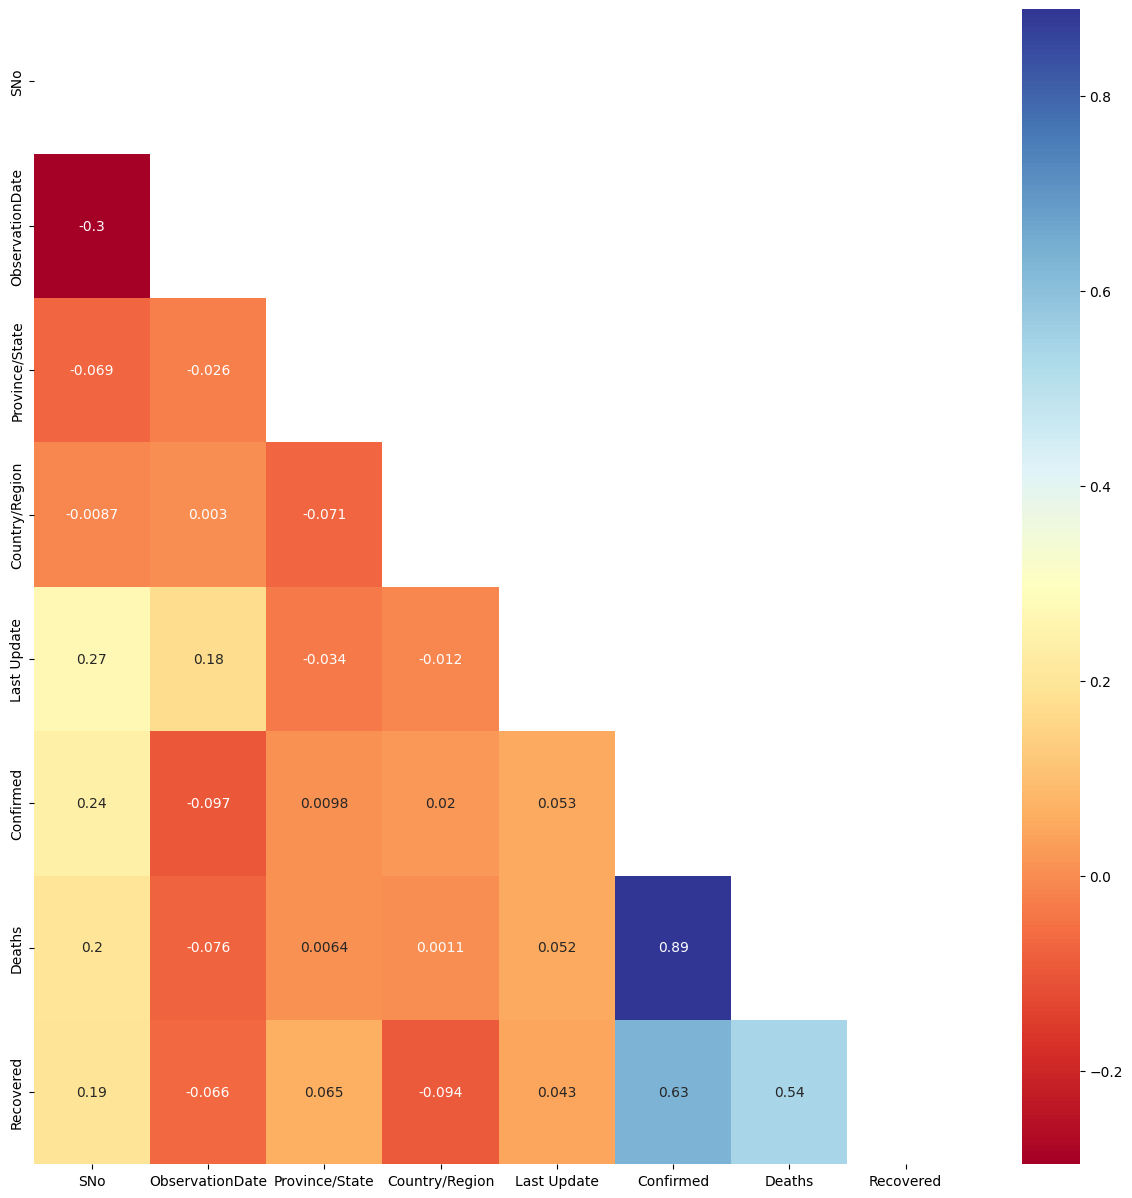

In [270]:
figure = plt.figure(figsize=(15, 15))
sns.heatmap(data_copy.corr(), cmap='RdYlBu', annot=True, mask=np.triu(data_copy.corr()))

In [271]:
def analyze_noise(df):
    """
    Analyzes the noise in each numeric column of the DataFrame and provides visualizations.

    Parameters:
    df (pandas.DataFrame): The DataFrame to be analyzed.

    Returns:
    None
    """

    for column in df.select_dtypes(include=[np.number]).columns:
        print(f"Analyzing column: {column}")

        # Descriptive statistics
        mean_col = df[column].mean()
        median_col = df[column].median()
        std_col = df[column].std()
        skewness_col = df[column].skew()

        print(f"Mean: {mean_col}")
        print(f"Median: {median_col}")
        print(f"Standard Deviation: {std_col}")
        print(f"Skewness: {skewness_col}")

        # Histogram
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f"Histogram of {column}")

        # Box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[column])
        plt.title(f"Box Plot of {column}")

        plt.show()

        # Time series plot if data has a time component
        if pd.api.types.is_datetime64_any_dtype(df.index):
            plt.figure(figsize=(10, 5))
            plt.plot(df.index, df[column])
            plt.title(f"Time Series Plot of {column}")
            plt.xlabel('Time')
            plt.ylabel(column)
            plt.show()

        # Signal-to-Noise Ratio (SNR)
        signal_power = np.mean(df[column] ** 2)
        noise_power = np.var(df[column])
        snr = signal_power / noise_power if noise_power != 0 else np.inf
        print(f"Signal-to-Noise Ratio (SNR): {snr}")

        print("\n" + "-"*40 + "\n")

Analyzing column: SNo
Mean: 153215.0
Median: 153215.0
Standard Deviation: 88458.57715620345
Skewness: 1.1586859416806885e-15


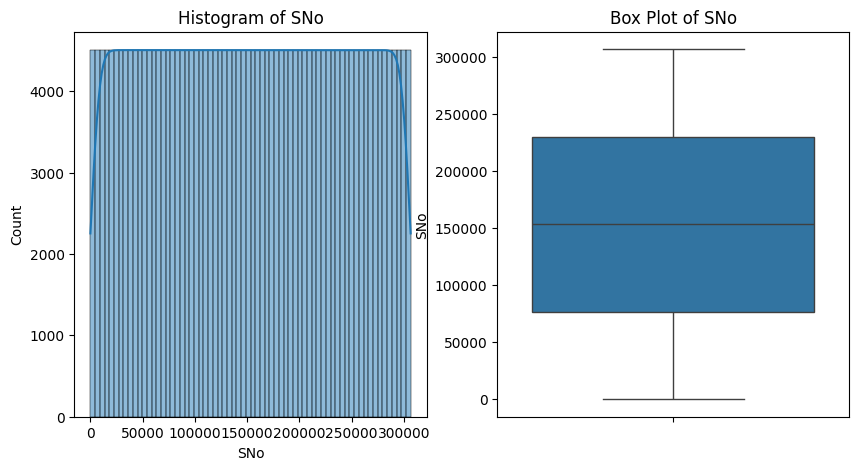

Signal-to-Noise Ratio (SNR): 4.000019580456095

----------------------------------------

Analyzing column: Confirmed
Mean: 85670.91155863185
Median: 10375.0
Standard Deviation: 277551.6040431502
Skewness: 8.768376652095425


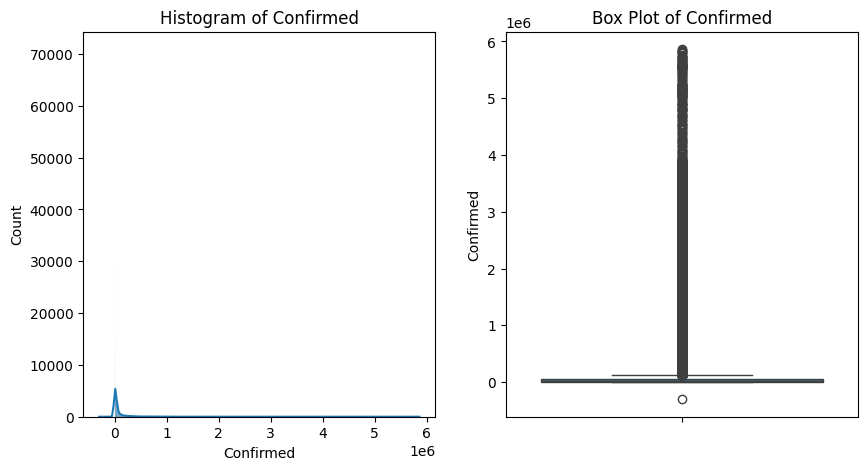

Signal-to-Noise Ratio (SNR): 1.0952753844671936

----------------------------------------

Analyzing column: Deaths
Mean: 2036.4032679674574
Median: 192.0
Standard Deviation: 6410.9380477066725
Skewness: 7.942416501708505


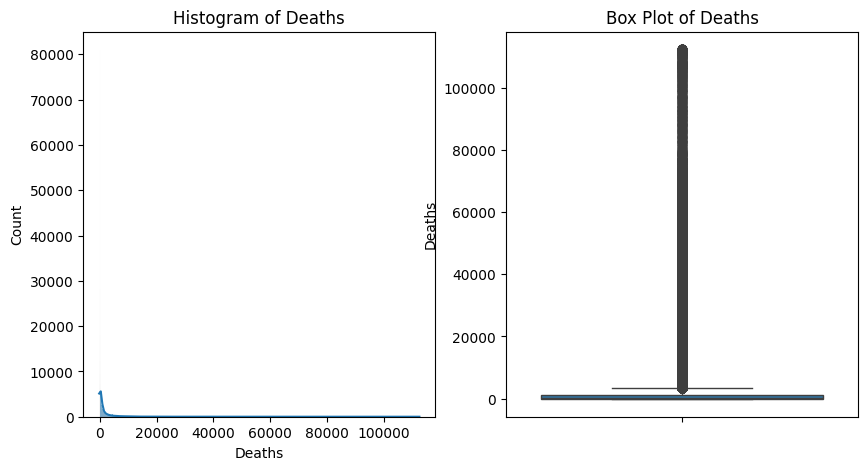

Signal-to-Noise Ratio (SNR): 1.1008987597071302

----------------------------------------

Analyzing column: Recovered
Mean: 50420.28630449468
Median: 1751.0
Standard Deviation: 201512.44783805608
Skewness: 10.694094429331887


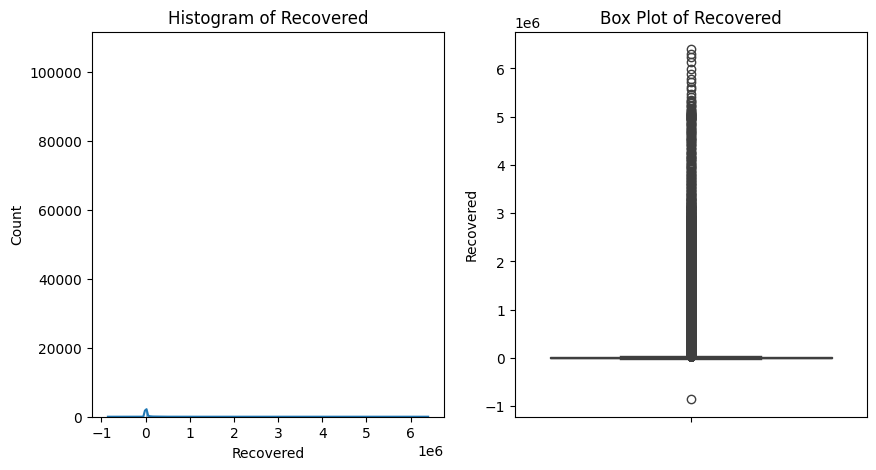

Signal-to-Noise Ratio (SNR): 1.0626048926222182

----------------------------------------



In [272]:
analyze_noise(data)

Analyzing column: SNo
Mean: 153215.0
Median: 153215.0
Standard Deviation: 88458.57715620345
Skewness: 1.1586859416806885e-15


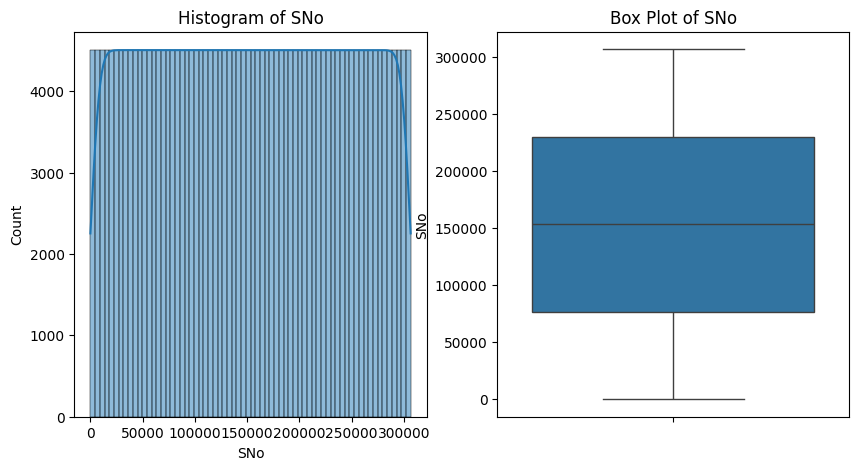

Signal-to-Noise Ratio (SNR): 4.000019580456095

----------------------------------------

Analyzing column: ObservationDate
Mean: 270.3815141517285
Median: 289.0
Standard Deviation: 142.3028201402964
Skewness: -0.2683786522022269


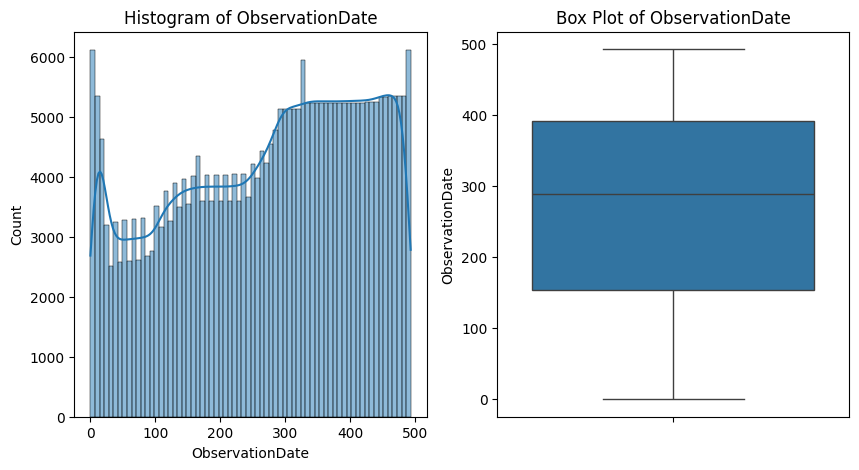

Signal-to-Noise Ratio (SNR): 4.610176167715001

----------------------------------------

Analyzing column: Province/State
Mean: 462.2782210561011
Median: 489.0
Standard Deviation: 244.079953585222
Skewness: -0.3513324857447318


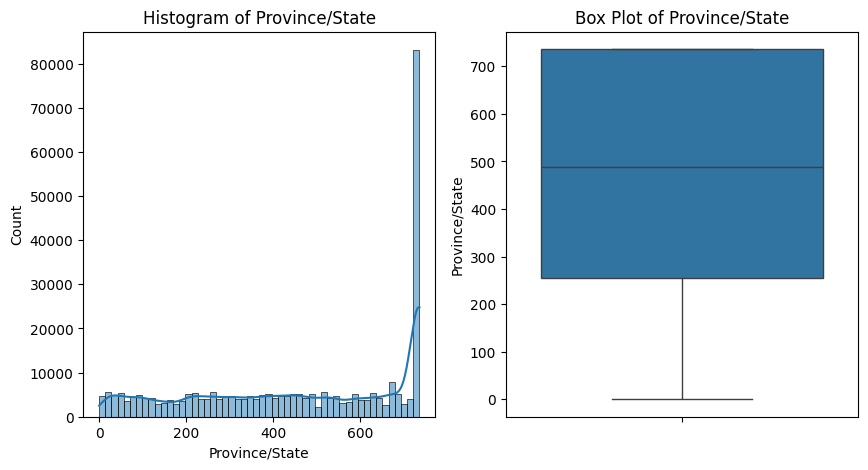

Signal-to-Noise Ratio (SNR): 4.587104756886384

----------------------------------------

Analyzing column: Country/Region
Mean: 127.72857660338937
Median: 126.0
Standard Deviation: 64.2185374855337
Skewness: -0.20972126754405584


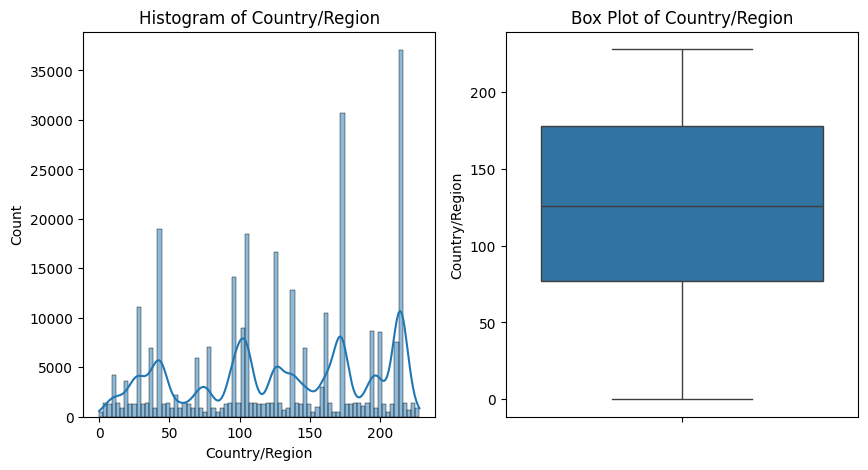

Signal-to-Noise Ratio (SNR): 4.956004170611087

----------------------------------------

Analyzing column: Last Update
Mean: 1822.897712031172
Median: 1842.0
Standard Deviation: 170.06422295532658
Skewness: -8.267352006833763


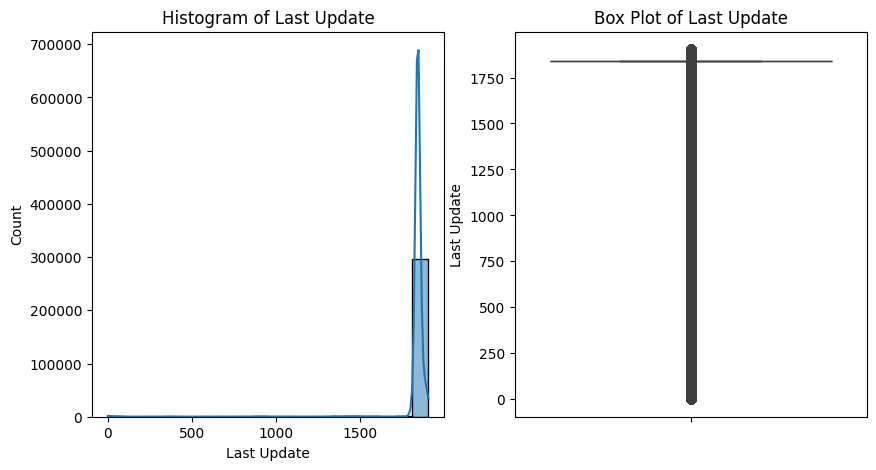

Signal-to-Noise Ratio (SNR): 115.89472733429342

----------------------------------------

Analyzing column: Confirmed
Mean: 85670.91155863185
Median: 10375.0
Standard Deviation: 277551.6040431502
Skewness: 8.768376652095425


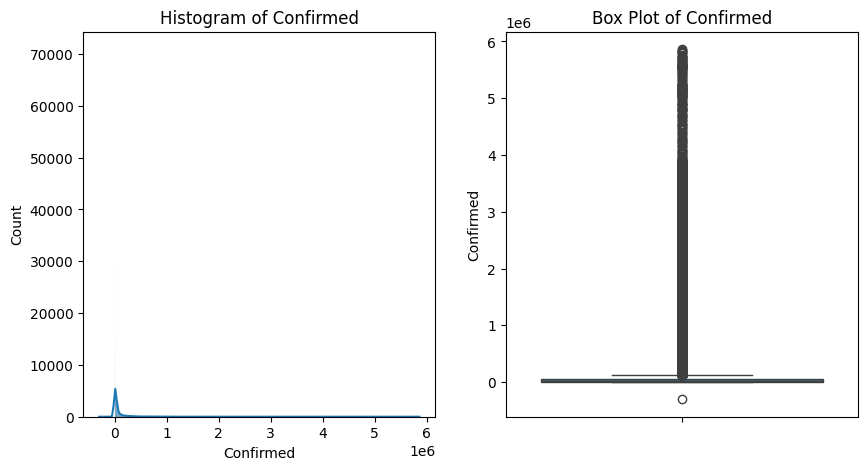

Signal-to-Noise Ratio (SNR): 1.0952753844671936

----------------------------------------

Analyzing column: Deaths
Mean: 2036.4032679674574
Median: 192.0
Standard Deviation: 6410.9380477066725
Skewness: 7.942416501708505


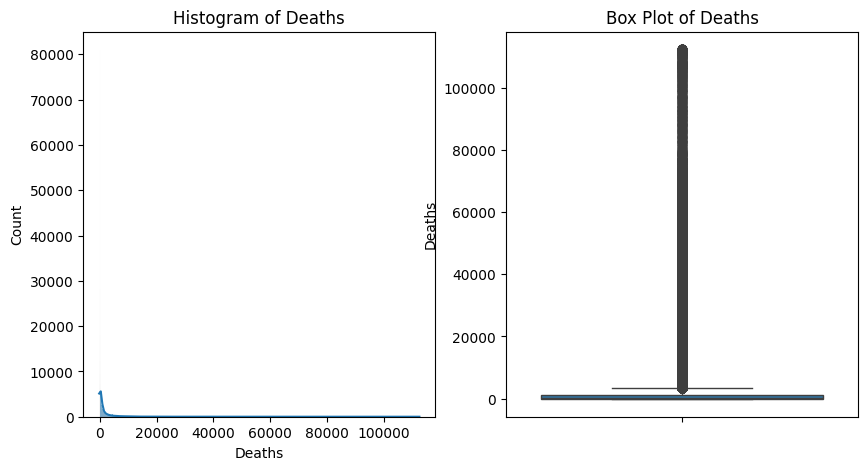

Signal-to-Noise Ratio (SNR): 1.1008987597071302

----------------------------------------

Analyzing column: Recovered
Mean: 50420.28630449468
Median: 1751.0
Standard Deviation: 201512.44783805608
Skewness: 10.694094429331887


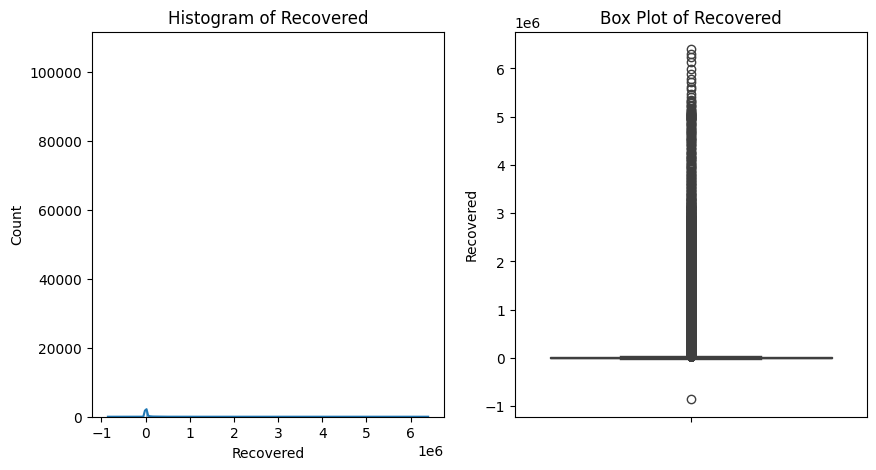

Signal-to-Noise Ratio (SNR): 1.0626048926222182

----------------------------------------



In [273]:
analyze_noise(data_copy)

<a id="ieda"></a>
## <p style="background-color:#23ff16; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 3.3 : Intelligently EDA</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="i1"></a>
## <p style="background-color:#23ff96; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 3.3.1 : Pandas Profiling</p>

⬆️ [Tabel of Contents](#contents_tabel)

<h2 style=color:green align="left"> 1) For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report </h2>

 - **Type inference:** detect the types of columns in a dataframe.

 - **Essentials:** type, unique values, missing values

 - **Quantile statistics** like minimum value, Q1, median, Q3, maximum, range, interquartile range

 - **Descriptive statistics** like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness

 - **Most frequent values**

 - **Histogram**

 - **Correlations** highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices

 - **Missing values** matrix, count, heatmap and dendrogram of missing values

 - **Text analysis** learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.

 - **File and Image analysis** extract file sizes, creation dates and dimensions and scan for truncated images or those containing EXIF information.

<h2 style=color:green align="left"> 2) Understanding the Report </h2>

 - The report generated contains a general overview and different sections for different characteristics of attributes of the dataset. The different sections are:
 
#### A) Overview

 - Statistics on the overall dataset and the number of variables (columns) and observations (rows).

#### B) Variable Properties

 - We can scroll down to see all the variables in the dataset and their properties.
 
 - This is just a data science-type name for the columns, dimensions or fields in your dataset (table). Summary statistics and distribution plots are provided for each column in the dataset.
 
#### C) Interaction of Variables

 - Similarly, we can also view the interaction of different attributes of the dataset with each other.
 
 - A quick interactive way to explore the columns and plot them against each other as scatterplots.
 
#### D) Correlations of the variable

 - The report generated contains different types of correlations like Spearman’s, Kendall’s, etc. of all the attributes of the dataset.
 
 - A set of different correlation matrices so you can quickly see how the columns in your data correlate or impact each other. TIP: To see a brief explanation of each correlation, click "Toggle correlation descriptions".
 
#### E) Missing Values

 - Other than this the report also shows which attributes have missing values.
 
 - The report generated is really helpful in identifying patterns in the data and finding out the characteristics of the data. 
 
 - A few different visual summaries about missing values in the dataset for each column.
 
#### F) Samples

 - Data previews of the first and last 10 rows in the dataset.

<h2 style=color:green align="left"> 3) Displaying and Saving the Report </h2>

 - Once you have the data profile object, there's a few different methods you can choose from to display and save the report.

#### Display in the notebook:

      to_widgets()
      to_notebook_iframe()

#### Assign to a string:

      to_html()
      to_json()

#### Save as a file:

     to_file("report_name.html")
     to_file("report_name.json")

In [274]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

FM 2: Write some Analysis on these plots 

<a id="i2"></a>
## <p style="background-color:#23ff96; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 3.3.2 : PandasAI</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [275]:
# Instantiate a LLM
llm = OpenAI(
    base_url="https://api.avalai.ir/v1",
    api_token="aa-rzDrWuppbQrkuqnQiUR2PuLKI96HFxT1jrpWQPrAu2isMlyW",
    temperature=0,
    seed=26
)

In [276]:
data = SmartDataframe(data, config={"llm": llm})
data.chat('Which are the 5 seekest countries?')

Traceback (most recent call last):
  File "c:\Users\98937\AppData\Local\Programs\Python\Python312\Lib\site-packages\httpx\_transports\default.py", line 69, in map_httpcore_exceptions
    yield
  File "c:\Users\98937\AppData\Local\Programs\Python\Python312\Lib\site-packages\httpx\_transports\default.py", line 233, in handle_request
    resp = self._pool.handle_request(req)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\98937\AppData\Local\Programs\Python\Python312\Lib\site-packages\httpcore\_sync\connection_pool.py", line 216, in handle_request
    raise exc from None
  File "c:\Users\98937\AppData\Local\Programs\Python\Python312\Lib\site-packages\httpcore\_sync\connection_pool.py", line 196, in handle_request
    response = connection.handle_request(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\98937\AppData\Local\Programs\Python\Python312\Lib\site-packages\httpcore\_sync\connection.py", line 99, in handle_request
    raise exc
  File "c:\Users\98937\AppData\L

'Unfortunately, I was not able to answer your question, because of the following error:\n\nConnection error.\n'

In [280]:
%%html
<iframe src="https://www.linkedin.com/embed/feed/update/urn:li:ugcPost:7060641449888882688" height="901" width="504" frameborder="0" allowfullscreen="" title="Embedded post"></iframe>

In [281]:
%%HTML
<iframe src="https://www.linkedin.com/embed/feed/update/urn:li:ugcPost:7222315842544226304" height="861" width="504" frameborder="0" allowfullscreen="" title="Embedded post"></iframe>